In [1]:
# Employee Attrition Prediction is the process of using machine learning or statistical methods 
# to analyze employee data and predict whether an employee is likely to leave the organization.  
# It helps companies take proactive measures to retain valuable employees by identifying key factors 
# such as job satisfaction, workload, salary, and work environment that influence attrition.

In [2]:
# https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [3]:
# NumPy (Numerical Python) is a powerful library for numerical computing in Python. 
# It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions.

# Pandas is a data manipulation and analysis library built on top of NumPy. 
# It provides data structures like Series and DataFrame, making it easy to handle structured data efficiently.

import numpy as np
import pandas as pd

In [4]:
 df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
pd.options.display.max_columns=500
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [6]:
df.shape

(1470, 35)

Jobs: Programmer, Designer, Clerk, Manager

Job - Programmer

One-Hot Encode= Programmer, Designer, Clerk, Manager

Programmer - 1
Designer - 0

In [7]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [8]:
print(df['Gender'].value_counts())

Gender
Male      882
Female    588
Name: count, dtype: int64


In [9]:
# Binary Attrition, Gender, Over18, Overtime

In [10]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x== 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x== 'Male' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x== 'Y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x== 'Yes' else 0)

In [11]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8


In [12]:
# One Hot Encoding: Business, Travel, Department, EducationaField, JobRole, MaritalStatus, 
pd.get_dummies(df['BusinessTravel'])

,Non-Travel,Travel_Frequently,Travel_Rarely
0,False,False,True
1,False,True,False
2,False,False,True
3,False,True,False
4,False,False,True
...,...,...,...
1465,False,True,False
1466,False,False,True
1467,False,False,True
1468,False,True,False


In [13]:
df.join(pd.get_dummies(df['BusinessTravel']))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,False,True,False
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,False,False,True
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,False,False,True
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,False,True,False


In [14]:
df = df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel', axis=1)
df

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely
0,41,1,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True
1,49,0,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False
2,37,1,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True
3,33,0,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False
4,27,0,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,False,True,False
1466,39,0,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,False,False,True
1467,27,0,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,False,False,True
1468,49,0,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,False,True,False


In [15]:
print(pd.get_dummies(df['Department']))

      Human Resources  Research & Development  Sales
0               False                   False   True
1               False                    True  False
2               False                    True  False
3               False                    True  False
4               False                    True  False
...               ...                     ...    ...
1465            False                    True  False
1466            False                    True  False
1467            False                    True  False
1468            False                   False   True
1469            False                    True  False

[1470 rows x 3 columns]


In [16]:
pd.get_dummies(df['Department'] ,prefix= 'Department')

,Department_Human Resources,Department_Research & Development,Department_Sales
0,False,False,True
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
1465,False,True,False
1466,False,True,False
1467,False,True,False
1468,False,False,True


In [17]:
df.join(pd.get_dummies(df['Department'] ,prefix= 'Department'))

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales
0,41,1,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True
1,49,0,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False
2,37,1,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False
3,33,0,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False
4,27,0,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,False,True,False,False,True,False
1466,39,0,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,False,False,True,False,True,False
1467,27,0,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,False,False,True,False,True,False
1468,49,0,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,False,True,False,False,False,True


In [18]:
df = df.join(pd.get_dummies(df['Department'])).drop('Department', axis=1)
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales
0,41,1,1102,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True
1,49,0,279,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False
2,37,1,1373,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False
3,33,0,1392,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False
4,27,0,591,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,False,True,False,False,True,False
1466,39,0,613,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,False,False,True,False,True,False
1467,27,0,155,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,False,False,True,False,True,False
1468,49,0,1023,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,False,True,False,False,False,True


In [19]:
df = df.join(pd.get_dummies(df['EducationField'] ,prefix= 'Education')).drop ('EducationField', axis=1)

In [20]:
df = df.join(pd.get_dummies(df['JobRole'] ,prefix= 'Role')).drop ('JobRole', axis=1)

In [21]:
df = df.join(pd.get_dummies(df['MaritalStatus'] ,prefix= 'Status')).drop ('MaritalStatus', axis=1)

In [22]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1466,39,0,613,6,1,1,2062,4,1,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1467,27,0,155,4,3,1,2064,2,1,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1468,49,0,1023,2,3,1,2065,4,1,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False


In [23]:
df =df.map(lambda x:1 if x is True else 0 if x is False else x)

In [24]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [25]:
df= df.drop('EmployeeNumber', axis=1)

In [26]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,2,0,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,3,1,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,1,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,4,0,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,3,1,41,4,2,4,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,4,1,42,2,3,1,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2,1,87,4,2,2,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,4,1,63,2,2,2,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

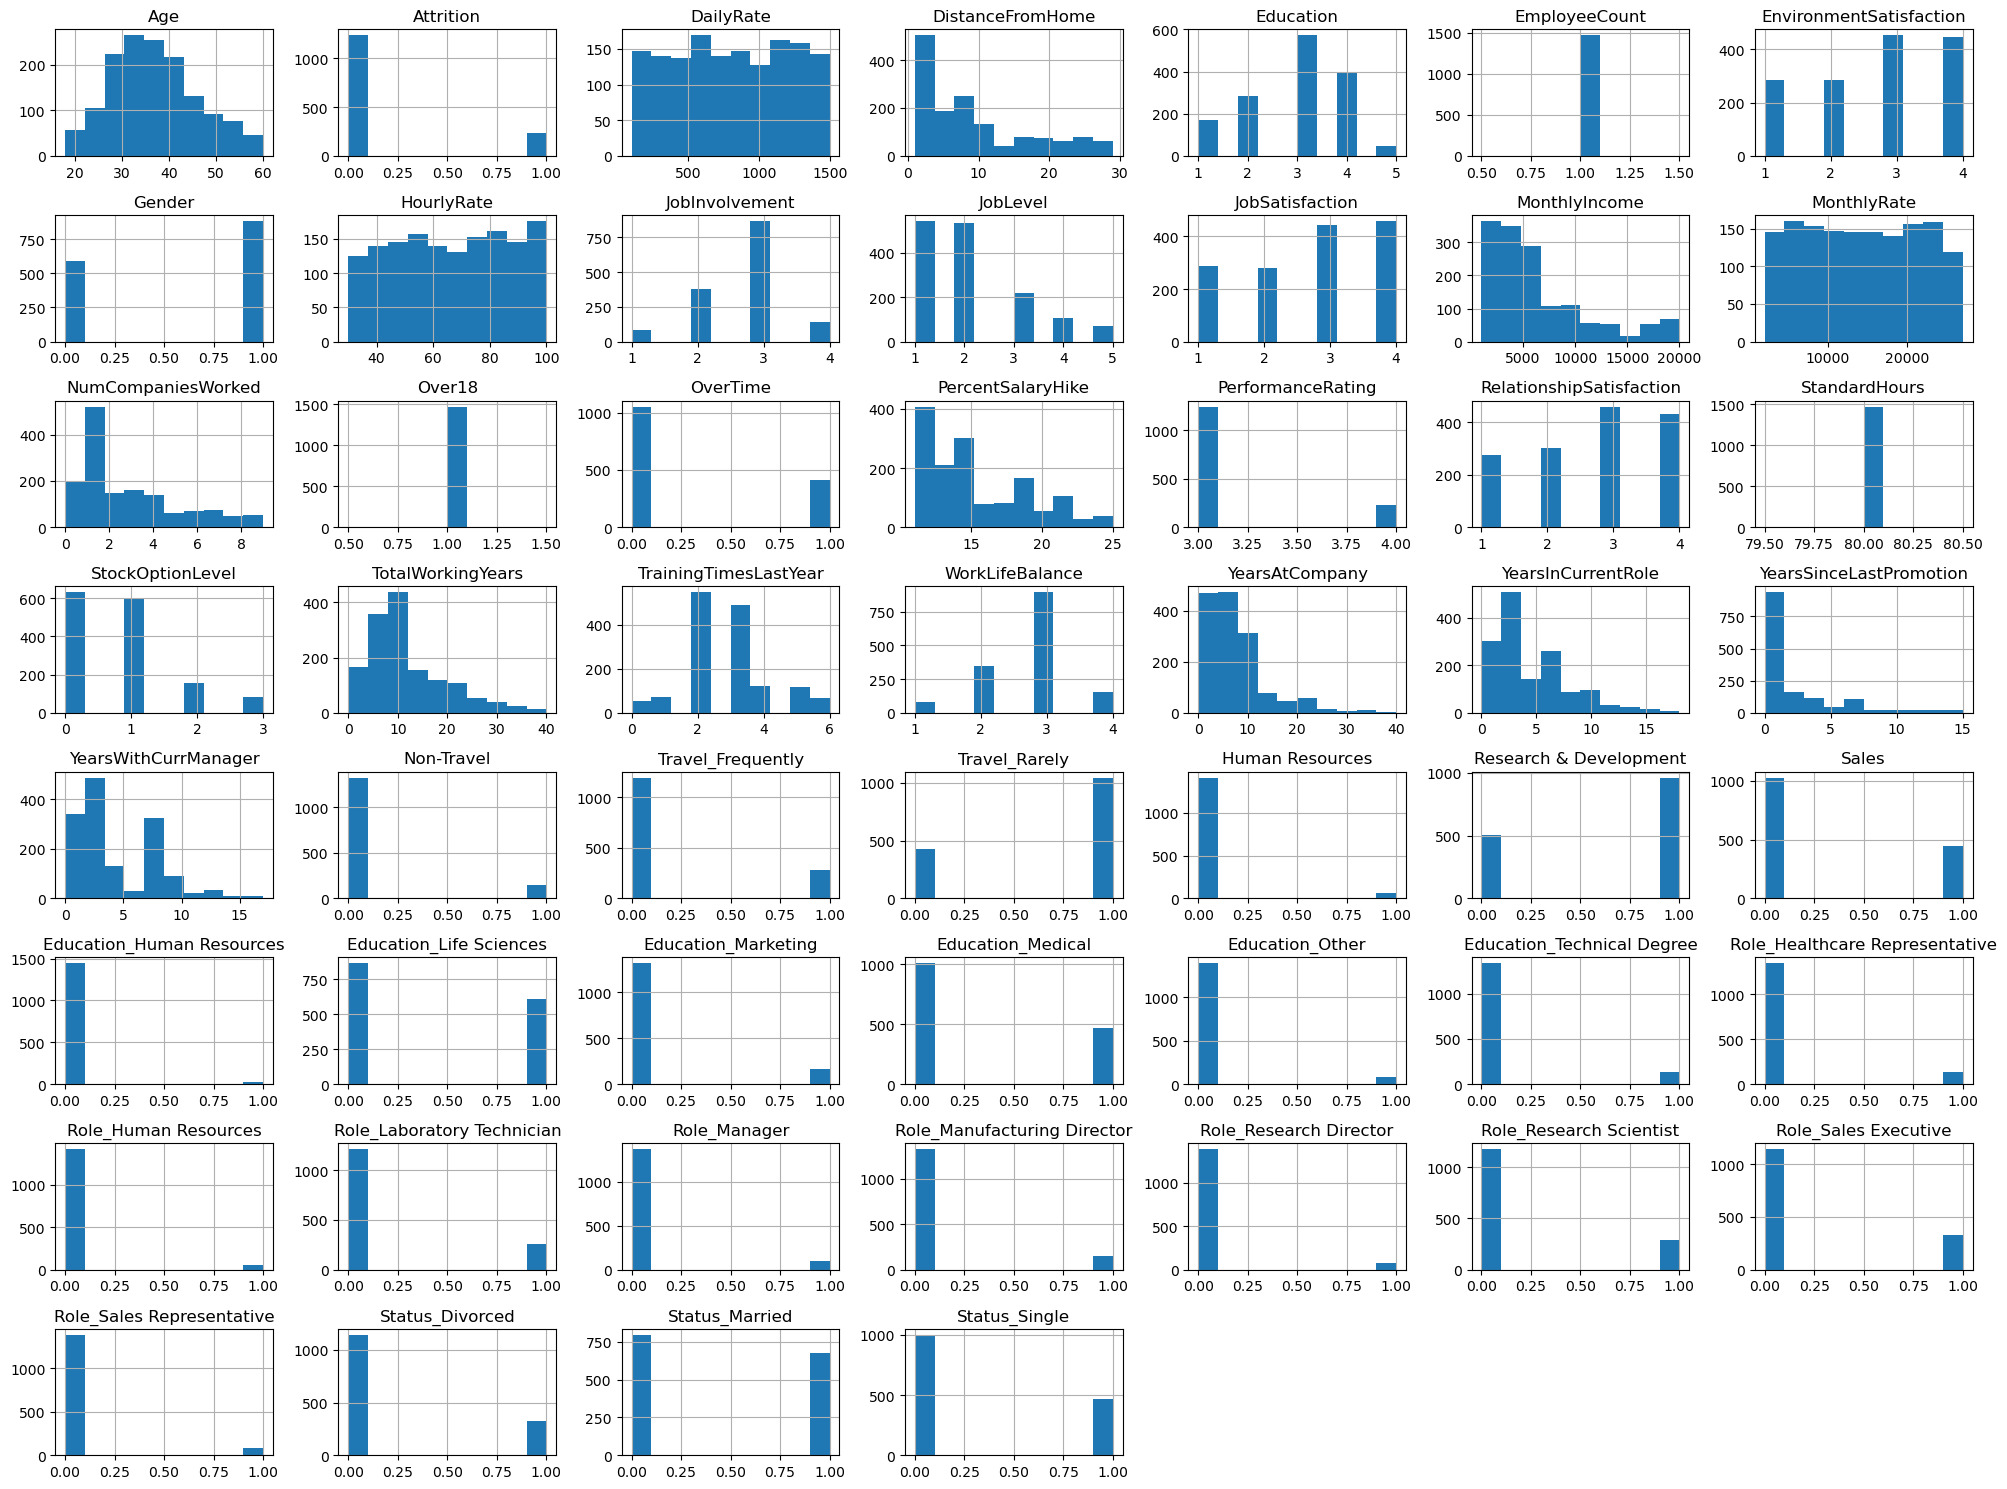

In [27]:
# Matplotlib is a popular Python library for data visualization.  
# It allows users to create static, animated, and interactive plots.  
# It provides functions for plotting line charts, bar charts, histograms, scatter plots, and more.  
# The most commonly used module is `pyplot`, which provides a simple interface similar to MATLAB.

import matplotlib.pyplot as plt
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show

In [28]:
df= df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [29]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


### Model Training

In [30]:
# RandomForestClassifier is an ensemble learning method from scikit-learn that builds multiple 
# decision trees and merges them to improve classification accuracy and reduce overfitting.

# train_test_split is a function used to split a dataset into training and testing sets, 
# helping evaluate the model's performance by training on one portion and testing on another.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X, y=  df.drop('Attrition', axis=1),df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
model = RandomForestClassifier(n_jobs=-1)

In [32]:
model.fit(X_train , y_train)

RandomForestClassifier(n_jobs=-1)

In [33]:
model.score(X_test, y_test)

0.8639455782312925

In [34]:
# model.feature_importances_ is an attribute of tree-based models like RandomForestClassifier.  
# It provides an array of importance scores for each feature, indicating their contribution 
# to the model’s predictions. Higher values mean the feature has a greater impact on the decision-making process.

model.feature_importances_

array([0.05380216, 0.05182385, 0.04372631, 0.01858905, 0.03131376,
       0.00831967, 0.04676847, 0.02523695, 0.01839148, 0.02503457,
       0.0750199 , 0.04965337, 0.03311374, 0.05420025, 0.03555497,
       0.00503838, 0.02071705, 0.02895555, 0.05518343, 0.0267625 ,
       0.02336965, 0.03922071, 0.02597236, 0.02362978, 0.02684541,
       0.00299741, 0.01478325, 0.00768979, 0.00236285, 0.00919926,
       0.00675562, 0.0034012 , 0.00752497, 0.00915725, 0.007182  ,
       0.00294192, 0.00671709, 0.00250512, 0.00279355, 0.00938335,
       0.00126994, 0.00267221, 0.0008374 , 0.00688497, 0.00749211,
       0.007974  , 0.00725835, 0.00689451, 0.01707854])

In [35]:
zip(model.feature_names_in_, model.feature_importances_)

In [36]:
dict(zip(model.feature_names_in_, model.feature_importances_))

{'Age': 0.05380215643774398,
 'DailyRate': 0.05182384852487397,
 'DistanceFromHome': 0.043726312381299814,
 'Education': 0.018589050895318055,
 'EnvironmentSatisfaction': 0.031313761679459415,
 'Gender': 0.008319670814407217,
 'HourlyRate': 0.046768469456322445,
 'JobInvolvement': 0.025236951539871887,
 'JobLevel': 0.01839148432855608,
 'JobSatisfaction': 0.025034570353382628,
 'MonthlyIncome': 0.07501989982001507,
 'MonthlyRate': 0.04965337261244898,
 'NumCompaniesWorked': 0.03311374466560377,
 'OverTime': 0.05420024706608397,
 'PercentSalaryHike': 0.03555496899165159,
 'PerformanceRating': 0.00503837845936508,
 'RelationshipSatisfaction': 0.020717049857723584,
 'StockOptionLevel': 0.02895554705043515,
 'TotalWorkingYears': 0.05518343220549978,
 'TrainingTimesLastYear': 0.026762500606224097,
 'WorkLifeBalance': 0.023369652524317067,
 'YearsAtCompany': 0.03922070542864954,
 'YearsInCurrentRole': 0.025972361778466697,
 'YearsSinceLastPromotion': 0.023629777769699465,
 'YearsWithCurrMana

In [37]:
sorted(zip(model.feature_names_in_, model.feature_importances_), key= lambda x: x[1])

[('Role_Research Director', 0.0008373986673481193),
 ('Role_Manager', 0.0012699363145240563),
 ('Human Resources', 0.0023628526003409553),
 ('Role_Healthcare Representative', 0.002505120096078072),
 ('Role_Manufacturing Director', 0.0026722088556672954),
 ('Role_Human Resources', 0.002793554207628005),
 ('Education_Other', 0.0029419203655962315),
 ('Non-Travel', 0.0029974124135395746),
 ('Education_Human Resources', 0.0034012033492631408),
 ('PerformanceRating', 0.00503837845936508),
 ('Education_Technical Degree', 0.006717094493364199),
 ('Sales', 0.006755618087167054),
 ('Role_Research Scientist', 0.006884973083790175),
 ('Status_Married', 0.00689451050928622),
 ('Education_Medical', 0.007181997167156022),
 ('Status_Divorced', 0.007258352382475377),
 ('Role_Sales Executive', 0.007492108571340866),
 ('Education_Life Sciences', 0.007524968589569066),
 ('Travel_Rarely', 0.007689788751869634),
 ('Role_Sales Representative', 0.007973996515463929),
 ('Gender', 0.008319670814407217),
 ('Edu

In [38]:
dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key= lambda x: x[1], reverse=True))

{'MonthlyIncome': 0.07501989982001507,
 'TotalWorkingYears': 0.05518343220549978,
 'OverTime': 0.05420024706608397,
 'Age': 0.05380215643774398,
 'DailyRate': 0.05182384852487397,
 'MonthlyRate': 0.04965337261244898,
 'HourlyRate': 0.046768469456322445,
 'DistanceFromHome': 0.043726312381299814,
 'YearsAtCompany': 0.03922070542864954,
 'PercentSalaryHike': 0.03555496899165159,
 'NumCompaniesWorked': 0.03311374466560377,
 'EnvironmentSatisfaction': 0.031313761679459415,
 'StockOptionLevel': 0.02895554705043515,
 'YearsWithCurrManager': 0.02684541246235095,
 'TrainingTimesLastYear': 0.026762500606224097,
 'YearsInCurrentRole': 0.025972361778466697,
 'JobInvolvement': 0.025236951539871887,
 'JobSatisfaction': 0.025034570353382628,
 'YearsSinceLastPromotion': 0.023629777769699465,
 'WorkLifeBalance': 0.023369652524317067,
 'RelationshipSatisfaction': 0.020717049857723584,
 'Education': 0.018589050895318055,
 'JobLevel': 0.01839148432855608,
 'Status_Single': 0.01707853739940862,
 'Travel_F

In [39]:
sorted_importances=dict(sorted(zip(model.feature_names_in_, model.feature_importances_), key= lambda x: x[1], reverse=True))

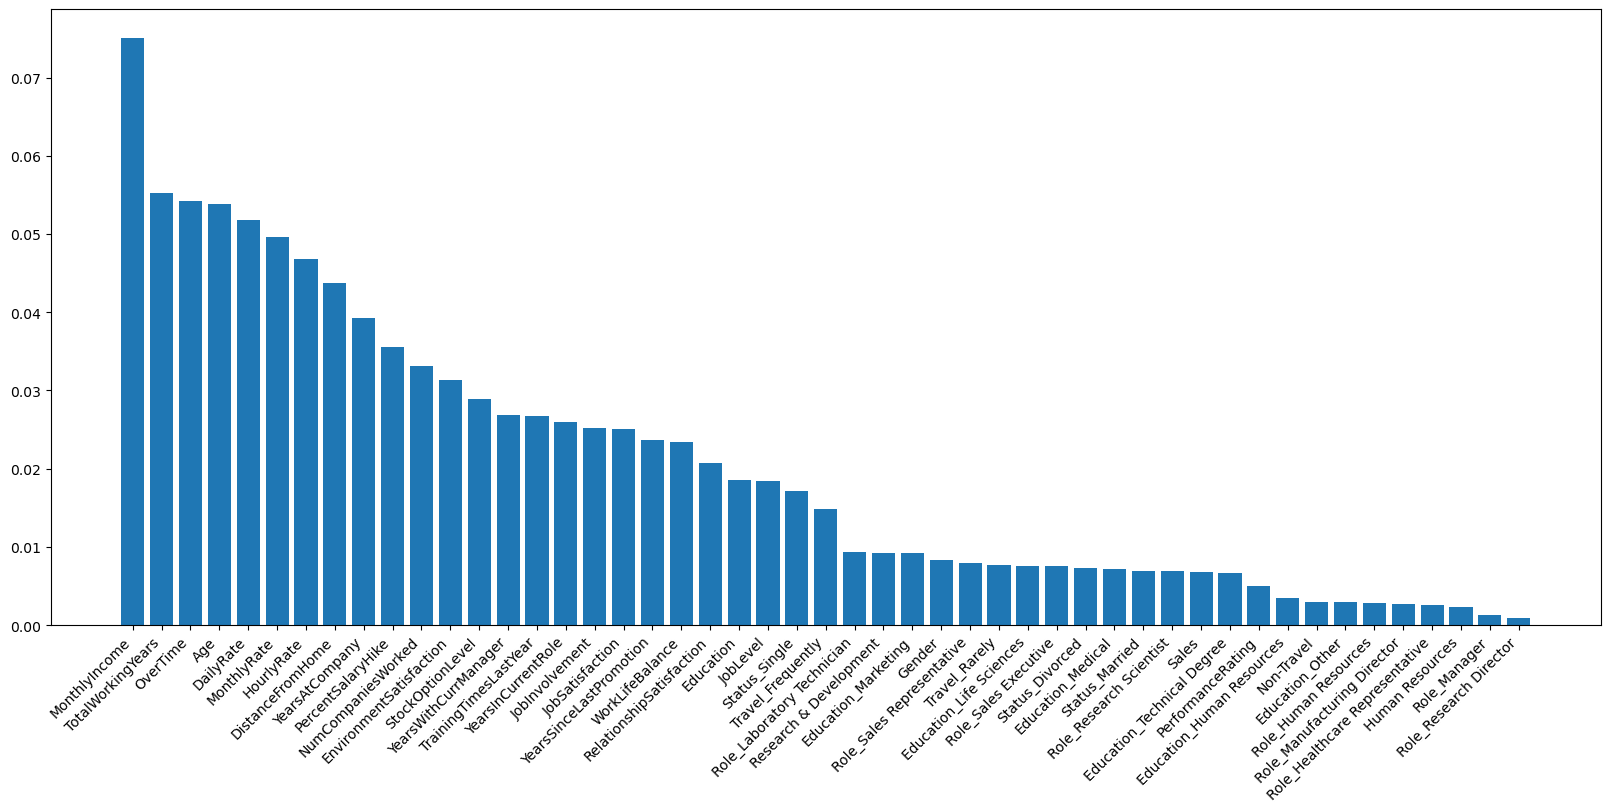

In [40]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt

# Creating a figure with a specified size (20 inches wide, 8 inches tall).
plt.figure(figsize=(20,8))

# Plotting a bar chart with feature names (keys) on the x-axis and their importance scores (values) on the y-axis.
plt.bar(sorted_importances.keys(), sorted_importances.values())

# Rotating x-axis labels by 45 degrees for better readability and aligning them to the right.
plt.xticks(rotation=45, ha='right')

# Displaying the plot.
plt.show()
